<a href="https://colab.research.google.com/github/gumin00/jupyter-notebook/blob/master/snippet/tensorflow-tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 텐서플로우 & 머신러닝 기초 강좌 (TensorFlow Machine Learning Basic Tutorial)
출처1: https://www.youtube.com/playlist?list=PLRx0vPvlEmdAbnmLH9yh03cw9UQU_o7PO<br>
출처2: https://bcho.tistory.com/1150<br>
출처3: https://pythonkim.tistory.com/8<br>
출처4: https://blog.naver.com/ndb796/221036493985

##  텐서플로우 사용 예: 8시간 일할 때 장사꾼의 예상 소득 구하기

In [0]:
# 출처: https://www.youtube.com/watch?v=bttjuId61dw&list=PLRx0vPvlEmdAbnmLH9yh03cw9UQU_o7PO&index=4
import tensorflow as tf

xData = [1, 2, 3, 4, 5, 6, 7]
yData = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

In [6]:
# tf.random_uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)
W = tf.Variable(tf.random_uniform([1], 100, -100))
b = tf.Variable(tf.random_uniform([1], 100, -100))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
H = W * X + b
cost = tf.reduce_mean(tf.square(H-Y))
a = tf.Variable(0.01)
# 경사하강함수에서 점프하는 정도/스텝
optimizer = tf.train.GradientDescentOptimizer(a)
# tensorflow 제공 경사하강라이브러리
train = optimizer.minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(5000):
  sess.run(train, feed_dict={X: xData, Y: yData})
  if i % 500 == 0:
    print(i, sess.run(cost, feed_dict={X: xData, Y: yData}), 
          sess.run(W), sess.run(b))

print(sess.run(H, feed_dict={X: [8]}))
    
  



0 4586553300.0 [10387.293] [2060.4983]
500 8686712.0 [25537.887] [1948.3828]
1000 8633799.0 [25627.559] [1504.3229]
1500 8632678.0 [25640.627] [1439.6149]
2000 8632660.0 [25642.533] [1430.1807]
2500 8632650.0 [25642.807] [1428.8195]
3000 8632655.0 [25642.844] [1428.6355]
3500 8632656.0 [25642.848] [1428.6133]
4000 8632656.0 [25642.848] [1428.6133]
4500 8632656.0 [25642.848] [1428.6133]
[206571.39]


## 텐서플로우의 변수, 상수, 플레이스홀더

- 상수형 (Constant): 상수를 저장하는 데이타 형
  - 정의:  tf.constant(value, dtype=None, shape=None, name='Const', verify_shape=False)
  - value : 상수의 값
  - dtype : 상수의 데이타형. tf.float32와 같이 실수,정수등의 데이타 타입을 정의
  - shape : 행렬의 차원을 정의. shape=[3,3]으로 정의해주면, 이 상수는 3x3 행렬을 저장
  - name : 이 상수의 이름을 정의

- 변수형 (Variable): y=W*x+b 라는 가설 있을 때,, x가 입력데이타라면, W와 b는 학습을 통해서 구해야 하는 값이 되는데 이를 변수(Variable)라고 함. 변수형은 Variable 형의 객체로 생성이 됨
  - 정의:  tf.Variable.__init__(initial_value=None, trainable=True, collections=None, validate_shape=True, caching_device=None, name=None, variable_def=None, dtype=None, expected_shape=None, import_scope=None)
  - 변수형에 값을 넣는 예<br>
    var = tf.Variable([1,2,3,4,5], dtype=tf.float32)

In [7]:
# 출처1: https://youtu.be/JbrBKPm1QEo?list=PLRx0vPvlEmdAbnmLH9yh03cw9UQU_o7PO
# 출처2: https://blog.naver.com/ndb796/221277981625
a = tf.constant(1)
b = tf.constant(2)
c = tf.add(a, b)

sess = tf.Session()
sess.run(c)

3

In [11]:
a = tf.Variable(5)
b = tf.Variable(3)
c = tf.multiply(a, b)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
sess.run(c)

15

In [12]:
# Variable은 변수이기에 값 변경 가능
a  = tf.Variable(15)
sess.run(c)
# 15 -> c라는 변수를 다시 초기화 해 주지 않았기 때문

15

In [13]:
a  = tf.Variable(15)  # 변수 값 변경
c = tf.multiply(a, b) # c 변수 초기화

init = tf.global_variables_initializer() 
sess.run(init) # 변수 값이 바뀌었기 때문에 다시 초기화

sess.run(c)

45

In [1]:
import tensorflow as tf

a = tf.constant([5],dtype=tf.float32)
b = tf.constant([10],dtype=tf.float32)
c = tf.constant([2],dtype=tf.float32)

d = a*b+c
print(d)
# a*b+c의 값이 아니라 다음과 같이 Tensor… 라는 문자열이 출력 됨
# 계산을 수행하는 것이 아니라 다음과 같이 a*b+c 그래프를 정의하는 것이기 때문
# 이 정의된 그래프에 a,b,c 값을 넣어서 실행해야 하는데, 세션 (Session)을 생성해 실행
# 세션은 그래프를 인자로 받아서 실행을 해주는 일종의 러너(Runner)

sess = tf.Session()
result = sess.run(d)

# tf.Session()을 통하여 세션을 생성하고, 이 세션에 그래프 d를 실행하도록 sess.run(d)를 실행

print(result)

Tensor("add:0", shape=(1,), dtype=float32)
[52.]


- 플레이스 홀더 (Placeholder):
 * 학습용 데이타를 담는 그릇. 학습데이타를 포함하는 변수
 * x 즉 입력값을 저장하는 일종의 통(버킷)
 * 값 또한 배열이 들어갈 수 있음
 * 실제 값을 할당할 과정을 피딩(Feeding)이라 함
 * 어떠한 데이터를 넣어 학습시킬 지 플레이스홀더에 정의하여 실제로 데이터를 넣을 수 있도록 설계를 하는 과정
 
    - 정의: tf.placeholder(dtype,shape,name) 
    - dtype : 플레이스홀더에 저장되는 데이타형
    - shape : 행렬의 차원을 정의. shape=[3,3]으로 정의해주면, 이 상수는 3x3 행렬을 저장
    - name : 이 플레이스 홀더의 이름을 정의
    

    
    
    

* 플레이스 홀더 예시
    * 여러 개의 데이터에 대해서 각각 5와 더한 값을 반환하는 프로그램 생성
    * 수식으로 표현하면 y= x + 5

- 플레이스 홀더의 원리
  * x 라는 데이터를 x+5로 처리해서 y라는 출력을 낸다고 미리 플레이스 홀더를 이용 해 정의하고 실제로 입력 값을 편하게 넣음
  * 입력값과 설계 된 수식을 분리 해 보다 간단하게 데이터 학습시키고 관리

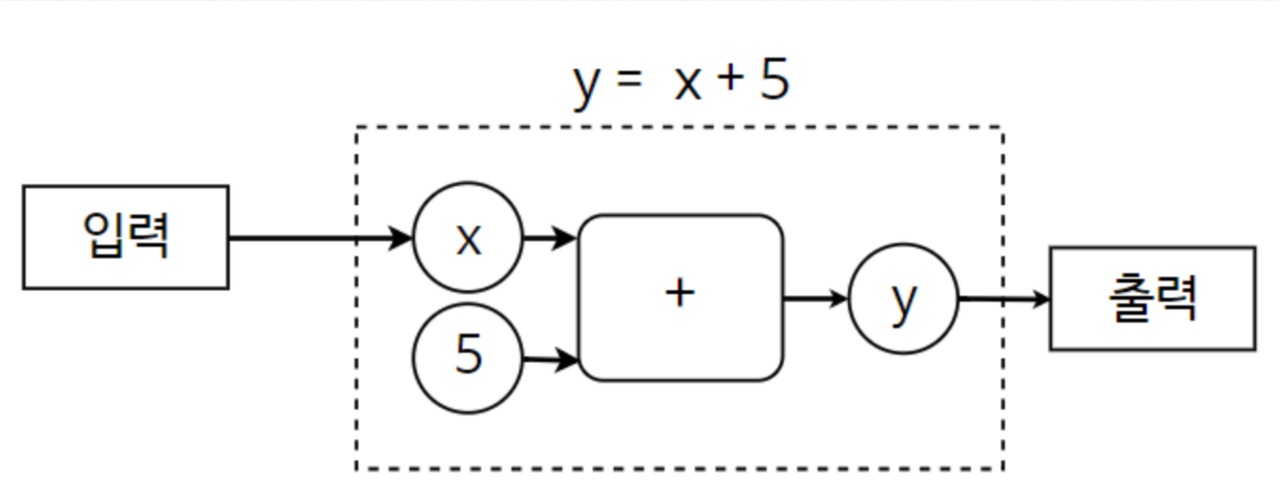

In [19]:
from IPython.display import Image

Image("https://i.postimg.cc/KY2Q3Ds4/2019-07-22-011924.png")

In [22]:
import tensorflow as tf
input = [1, 2, 3, 4, 5]
x = tf.placeholder(dtype=tf.float32)
y = x + 5

sess = tf.Session()
sess.run(y, feed_dict={x: input})

array([ 6.,  7.,  8.,  9., 10.], dtype=float32)

In [24]:
import tensorflow as tf
mathScore = [85, 99, 84, 97, 92] 
engIishScore = [59, 80, 84, 68, 77] 
a = tf.placeholder(dtype=tf.float32)
b = tf.placeholder(dtype=tf.float32)
y = (a + b) / 2

sess = tf.Session()
sess.run(y, feed_dict={a: mathScore, b: engIishScore})

array([72. , 89.5, 84. , 82.5, 84.5], dtype=float32)

In [2]:
import tensorflow as tf

input_data = [1,2,3,4,5]
x = tf.placeholder(dtype=tf.float32)
y = x * 2


sess = tf.Session()
result = sess.run(y,feed_dict={x:input_data})
# 세션이 실행될때, x라는 통에 값을 하나씩 집어 넣는데, (이를 피딩이라고 함)
# sess.run(y,feed_dict={x:input_data}) 와 같이 세션을 통해서 그래프를 실행할 때,
# feed_dict 변수를 이용해서 플레이스홀더 x에, input_data를 피드하면, 
# 세션에 의해 그래프 실행되며 x는 feed_dict에 의해서 정해진 피드 데이타 [1,2,3,4,5]를 하나씩 읽어서 실행

print(result)

[ 2.  4.  6.  8. 10.]


## 텐서플로우의 주요 함수
출처: https://blog.naver.com/ndb796/221278005363

- 상수형 (Constant): 상수를 저장하는 데이타 형
  - 정의:  tf.constant(value, dtype=None, shape=None, name='Const', verify_shape=False)
  - value : 상수의 값
  - dtype : 상수의 데이타형. tf.float32와 같이 실수,정수등의 데이타 타입을 정의
  - shape : 행렬의 차원을 정의. shape=[3,3]으로 정의해주면, 이 상수는 3x3 행렬을 저장
  - name : 이 상수의 이름을 정의

- 변수형 (Variable): y=W*x+b 라는 가설 있을 때,, x가 입력데이타라면, W와 b는 학습을 통해서 구해야 하는 값이 되는데 이를 변수(Variable)라고 함. 변수형은 Variable 형의 객체로 생성이 됨
  - 정의:  tf.Variable.__init__(initial_value=None, trainable=True, collections=None, validate_shape=True, caching_device=None, name=None, variable_def=None, dtype=None, expected_shape=None, import_scope=None)
  - 변수형에 값을 넣는 예<br>
    var = tf.Variable([1,2,3,4,5], dtype=tf.float32)